In [63]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
# sns.set_style("whitegrid")  # 美化背景

## 导入数据

数据地址：http://data.openkg.cn/dataset/ch4masterpieces

In [64]:
# 读取数据
df = pd.read_csv('./data/西游记/triples.csv')

df

,head,tail,relation,label
0,金蝉子,唐僧,past_life,前世
1,孙悟空,唐僧,apprentice,徒弟
2,猪八戒,唐僧,apprentice,徒弟
3,沙僧,唐僧,apprentice,徒弟
4,白龙马,唐僧,apprentice,徒弟
...,...,...,...,...
104,毗蓝婆菩萨,昴日星官,mother,母亲
105,嫦娥,后羿,wife,妻
106,敖摩昂,敖闰,son,儿
107,哪吒,李靖,son,儿


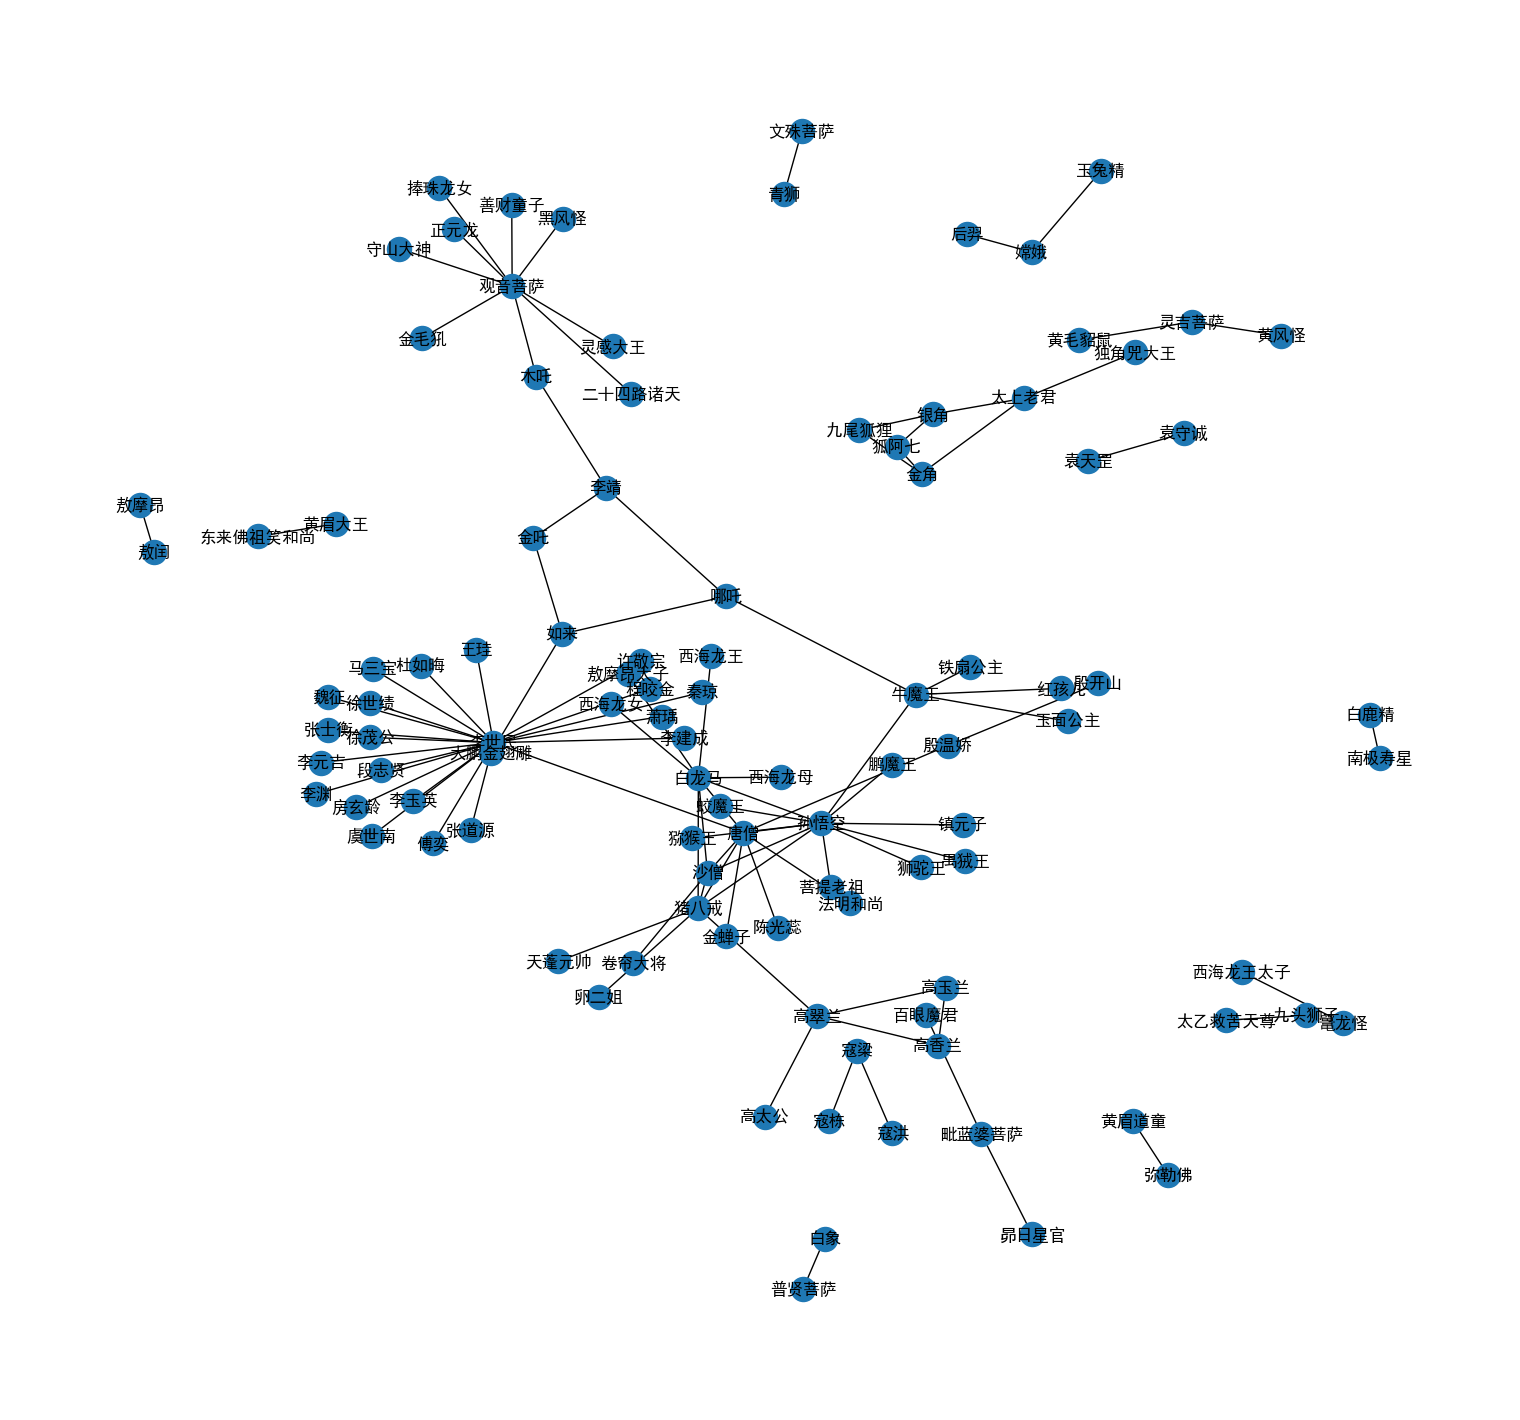

In [65]:
edges = [edeg for edeg in zip(df['head'],df['tail'])]
# edges
G = nx.Graph()
G.add_edges_from(edges)
G.nodes
plt.figure(figsize=(15,14))
pos = nx.spring_layout(G,iterations=19,seed=9)
nx.draw(G,pos=pos,with_labels=True,font_weight='bold')


## 计算结点PageRank

In [66]:
# 计算PageRank
pagerank = nx.pagerank(G, alpha=0.85, max_iter=100, tol=1e-4)

# 计算节点大小和颜色
node_sizes = np.array(list(pagerank.values())) * 8000
node_colors = np.array(list(pagerank.values()))

# 计算边的颜色
M = G.number_of_edges()
edge_colors = range(2, M + 2)
pagerank

{'金蝉子': 0.004528381983309191,
 '唐僧': 0.0329150127898228,
 '孙悟空': 0.044364899644661976,
 '猪八戒': 0.024511858358492466,
 '沙僧': 0.017486282363780522,
 '白龙马': 0.029002889362153197,
 '陈光蕊': 0.004528381983309191,
 '殷温娇': 0.009002285486310876,
 '法明和尚': 0.004528381983309191,
 '李世民': 0.09210884596911967,
 '殷开山': 0.005291938519806034,
 '菩提老祖': 0.004582786618796437,
 '镇元子': 0.004582786618796437,
 '牛魔王': 0.02054281679295143,
 '蛟魔王': 0.004582786618796437,
 '鹏魔王': 0.004582786618796437,
 '狮驼王': 0.004582786618796437,
 '猕猴王': 0.004582786618796437,
 '禺狨王': 0.004582786618796437,
 '天蓬元帅': 0.0044221484468000725,
 '卵二姐': 0.0044221484468000725,
 '高翠兰': 0.015396679789769814,
 '卷帘大将': 0.004419068553040231,
 '西海龙王': 0.00452805235203969,
 '西海龙母': 0.00452805235203969,
 '敖摩昂太子': 0.00452805235203969,
 '西海龙女': 0.00452805235203969,
 '李渊': 0.00526665708514742,
 '李建成': 0.00526665708514742,
 '李元吉': 0.00526665708514742,
 '王珪': 0.00526665708514742,
 '秦琼': 0.00526665708514742,
 '萧瑀': 0.00526665708514742,
 '傅奕': 0.0052666570

In [67]:
sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

[('李世民', 0.09210884596911967),
 ('孙悟空', 0.044364899644661976),
 ('观音菩萨', 0.04151563969875323),
 ('唐僧', 0.0329150127898228),
 ('白龙马', 0.029002889362153197),
 ('猪八戒', 0.024511858358492466),
 ('牛魔王', 0.02054281679295143),
 ('沙僧', 0.017486282363780522),
 ('高翠兰', 0.015396679789769814),
 ('寇梁', 0.013943878327171477),
 ('灵吉菩萨', 0.013943878327171477),
 ('毗蓝婆菩萨', 0.013943878327171477),
 ('嫦娥', 0.013943878327171477),
 ('如来', 0.012706178034327584),
 ('太上老君', 0.012428091431236977),
 ('李靖', 0.012158749986723397),
 ('哪吒', 0.012115533066825678),
 ('金角', 0.011941276790031758),
 ('银角', 0.011941276790031758),
 ('袁守诚', 0.009615384615384616),
 ('袁天罡', 0.009615384615384616),
 ('鼍龙怪', 0.009615384615384616),
 ('西海龙王太子', 0.009615384615384616),
 ('黄眉道童', 0.009615384615384616),
 ('弥勒佛', 0.009615384615384616),
 ('青狮', 0.009615384615384616),
 ('文殊菩萨', 0.009615384615384616),
 ('白象', 0.009615384615384616),
 ('普贤菩萨', 0.009615384615384616),
 ('九头狮子', 0.009615384615384616),
 ('太乙救苦天尊', 0.009615384615384616),
 ('白鹿精', 

## 可视化

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

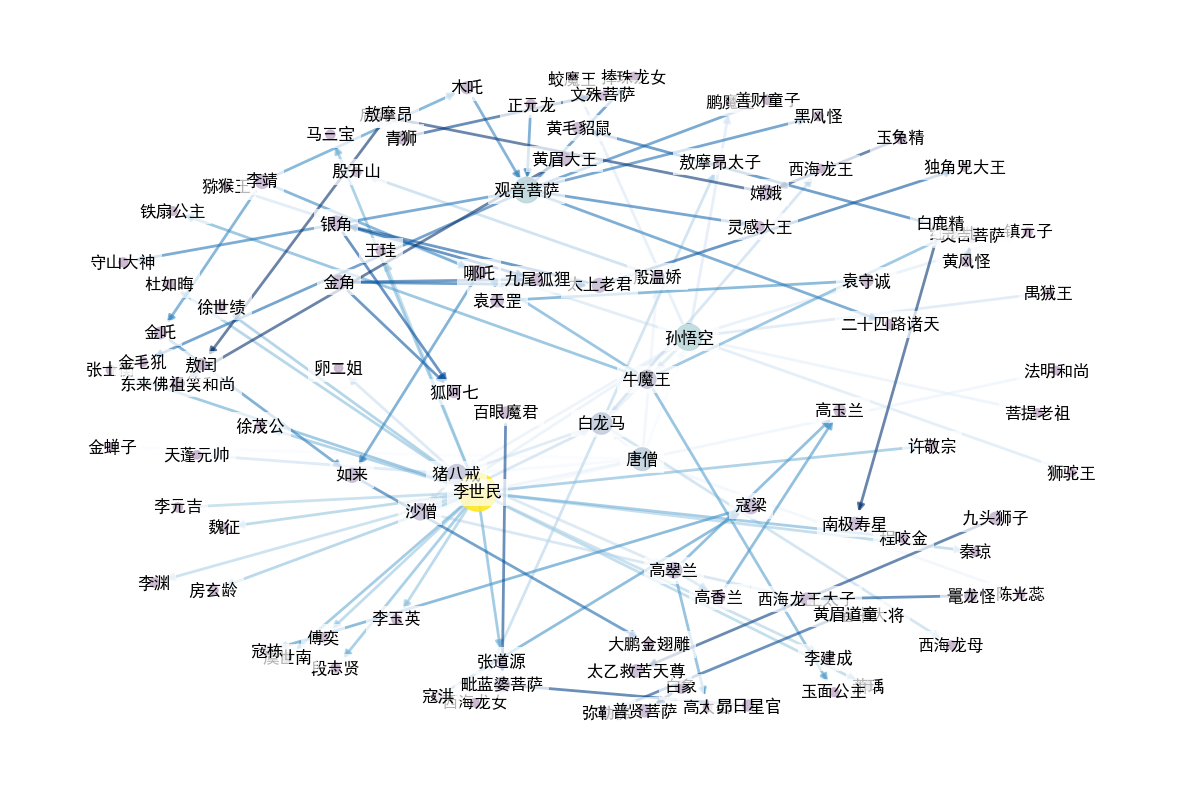

In [68]:
# 布局
pos = nx.spring_layout(G, k=0.5, iterations=30, seed=9)

# 绘图
plt.figure(figsize=(15, 10))

# 绘制节点
nodes = nx.draw_networkx_nodes(G, pos,
                               node_size=node_sizes,
                               node_color=node_colors,
                               cmap=plt.cm.viridis,
                               alpha=0.9)

# 绘制边
edges = nx.draw_networkx_edges(G, pos,
                               edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues,
                               width=2, alpha=0.6,
                               arrows=True,
                               arrowstyle='-|>',
                               min_target_margin=5)

# 绘制标签
labels = nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold',
                                 bbox=dict(facecolor="white", edgecolor="none", alpha=0.7))

# 关闭坐标轴
plt.axis('off')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label="PageRank 值")
plt.title("西游记人物关系图 - PageRank", fontsize=16, fontweight='bold')
plt.show()

In [77]:
import pandas as pd
import networkx as nx
from pyecharts import options as opts
from pyecharts.charts import Graph

# 读取数据
df = pd.read_csv('./data/西游记/triples.csv')

# 构建有向图
edges = [tuple(edge) for edge in zip(df['head'], df['tail'])]
G = nx.DiGraph()
G.add_edges_from(edges)

# 计算 PageRank
pagerank = nx.pagerank(G, alpha=0.85, max_iter=100, tol=1e-4)

# 归一化 PageRank 值（用于节点大小）
min_size, max_size = 10, 50
pr_values = list(pagerank.values())
min_pr, max_pr = min(pr_values), max(pr_values)

normalize = lambda x: min_size + (max_size - min_size) * (x - min_pr) / (max_pr - min_pr)

# 构造 pyecharts 图数据
nodes = [
    {"name": node, "symbolSize": normalize(pagerank[node]), "value": round(pagerank[node], 4)}
    for node in G.nodes
]

links = [{"source": u, "target": v} for u, v in G.edges]

# 创建交互式图表
graph = (
    Graph()
    .add(
        "",
        nodes,
        links,
        layout="force",  # 力导向布局
        repulsion=3000,  # 增强排斥力，避免节点重叠
        edge_symbol=["circle", "arrow"],  # 让边显示方向
        edge_symbol_size=8,
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="西游记人物关系图 - PageRank"),
        toolbox_opts=opts.ToolboxOpts(),  # 添加工具箱
        visualmap_opts=opts.VisualMapOpts(
            min_=min_pr, max_=max_pr, dimension=2, is_piecewise=False
        ),
    )
)

# 渲染 HTML（可直接在浏览器中打开）
graph.render("西游记人物关系图.html")


'C:\\Users\\28706\\Desktop\\2025计算机设计大赛\\PR-HITS-Influence\\Py_NetGraph\\notebooks\\四大名著\\西游记人物关系图.html'